In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Kaggle dataset Digit Recognizer
https://www.kaggle.com/competitions/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [3]:
df = pd.read_csv('data/train.csv')

Lets check info on the dataset like size, type, target and other columns

In [4]:
print(f'Shape {df.shape}')

Shape (42000, 785)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.describe() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


confirms our min max pixel

In [7]:
df['label'].nunique()

10

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We now now we have 784 pixel features and one target label.

Lets look at the distribution.

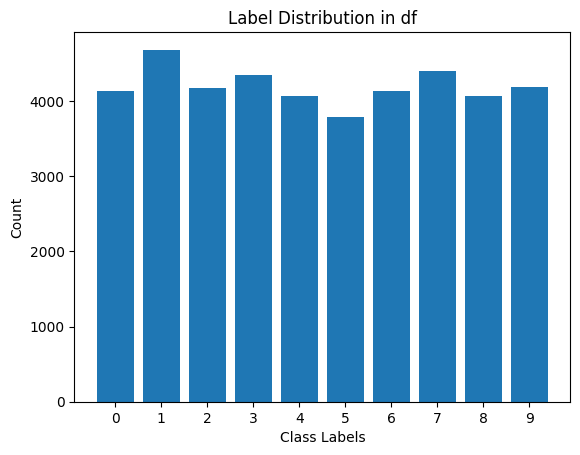

In [9]:
unique_labels, label_counts = np.unique(df['label'], return_counts=True)

# Create a bar plot to show the label distribution
plt.bar(unique_labels, label_counts)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Label Distribution in df')
plt.xticks(unique_labels)
plt.show()

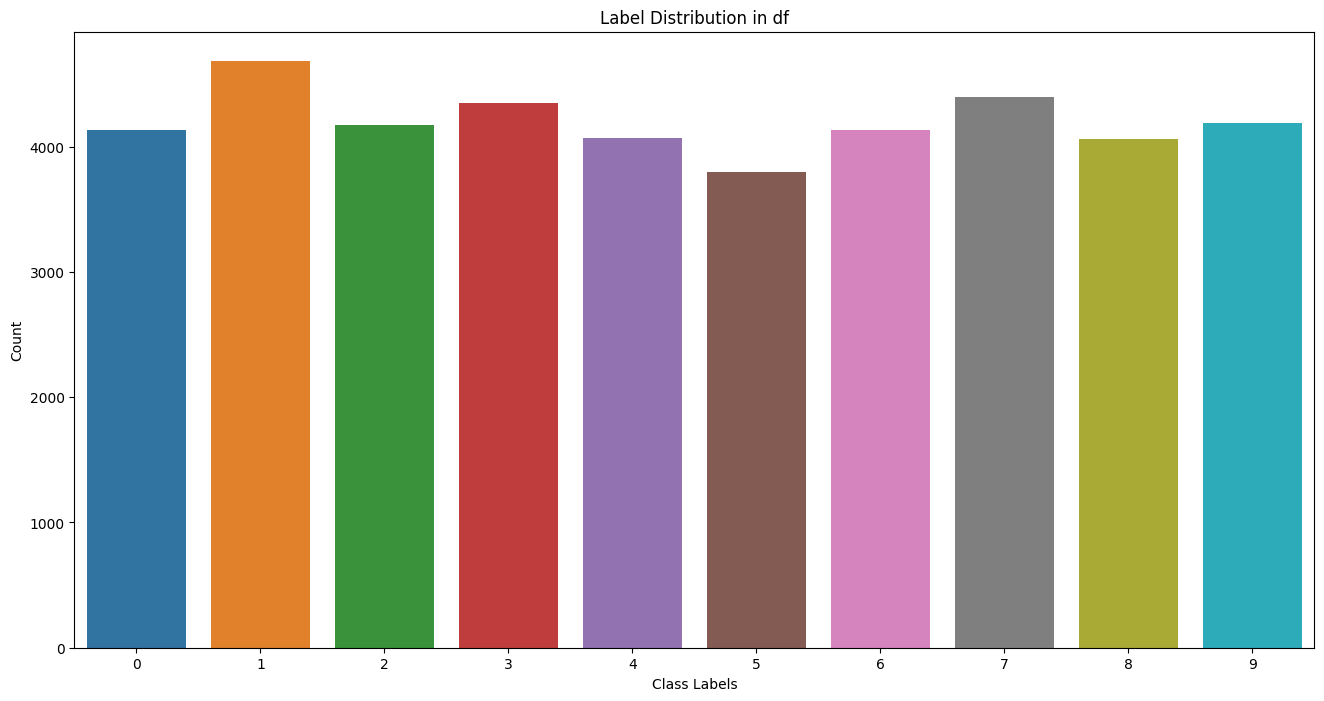

In [10]:
plt.figure(figsize=(16, 8))
sns.countplot(x='label', data=df)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Label Distribution in df')
plt.show()

Looks prety well distributed

Lets look at the data more we can reshape and look at the images

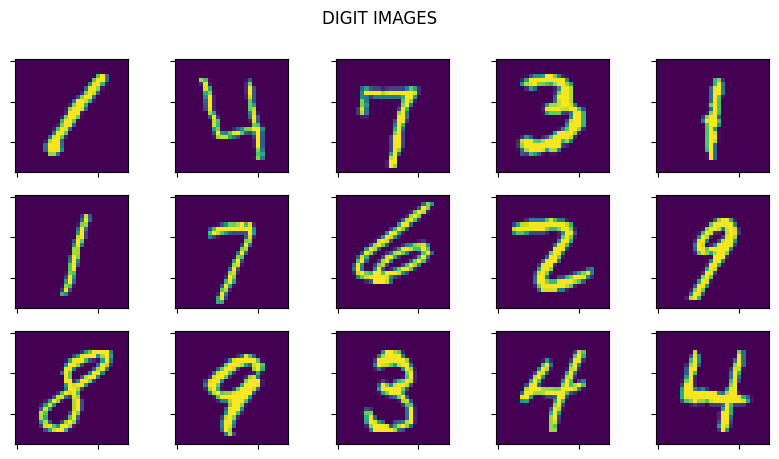

In [11]:
nb_rows = 3
nb_cols = 5
fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 5));
plt.suptitle('DIGIT IMAGES');
k = 0 
for i in range(0, nb_rows):
    for j in range(0, nb_cols):
        axs[i, j].xaxis.set_ticklabels([]);
        axs[i, j].yaxis.set_ticklabels([]);
        axs[i, j].imshow(df.iloc[k,1:].to_numpy().reshape(28,28));
        k = k + 3
plt.show();

Pretty cool we can reshape the images 28 by 28 and see each image.

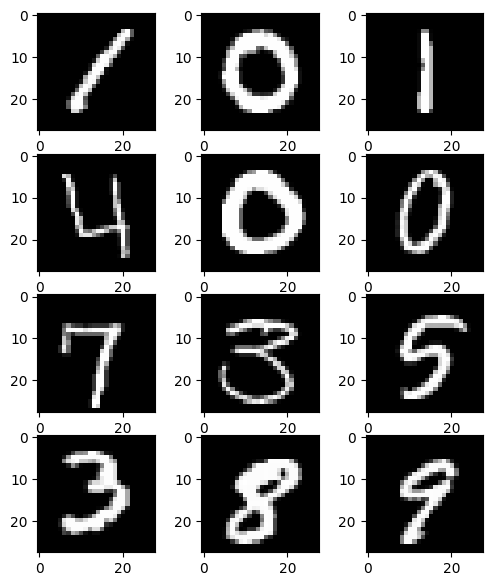

In [12]:
fig,ax = plt.subplots(4,3,figsize=(6,7))
arr = [i for i in range(len(df.loc[:,'label'].unique()))]
ax = ax.flatten()
for i in range(12):
    ax[i].imshow(df.iloc[i,1:].to_numpy().reshape(28,28),cmap='gray')

In [13]:
def show_full_image(i):
    plt.figure(figsize=(12,8))
    plt.imshow(df.iloc[i,1:].to_numpy().reshape(28,28),cmap='gray')
    plt.title(f"Digit no : {df.iloc[i,0]}")
    
    plt.xticks([])
    plt.yticks([])

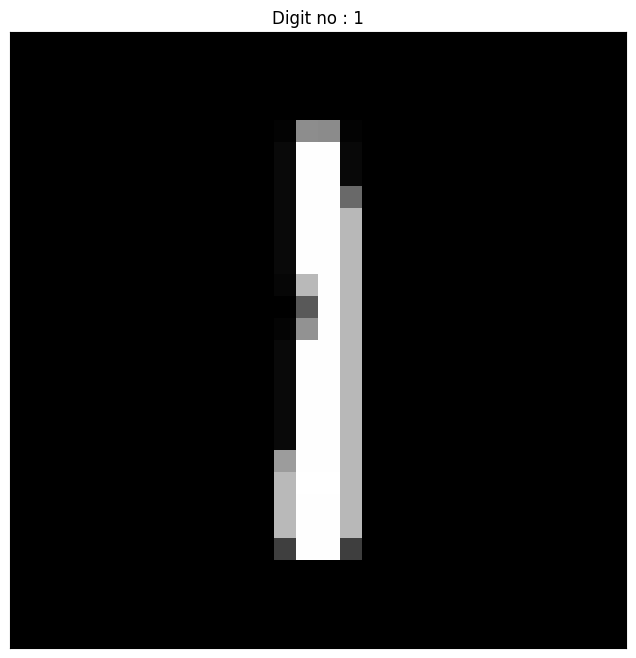

In [14]:
show_full_image(2)

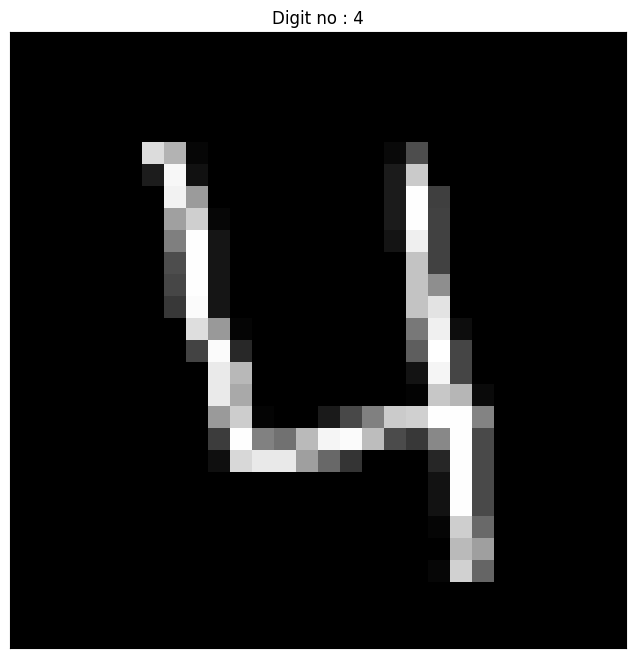

In [15]:
show_full_image(3)

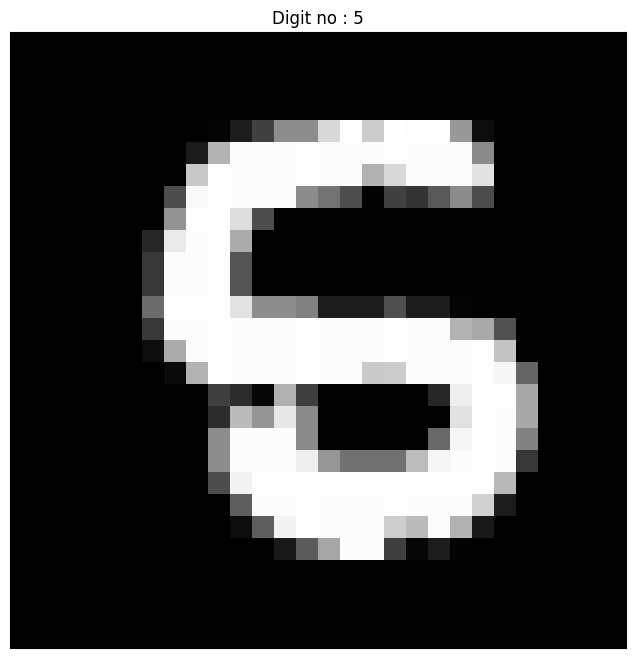

In [16]:
show_full_image(19)

In [17]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [18]:
# Separate labels (y) and features (X)
X = df.drop(['label'],axis=1)
y = df.label

In [19]:
# Reshape the data to 28x28 images and normalize pixel values
# # CNN converges faster on [0..1] data than on [0..255]
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f'shape X_train {X_train.shape}')

shape X_train (33600, 28, 28, 1)


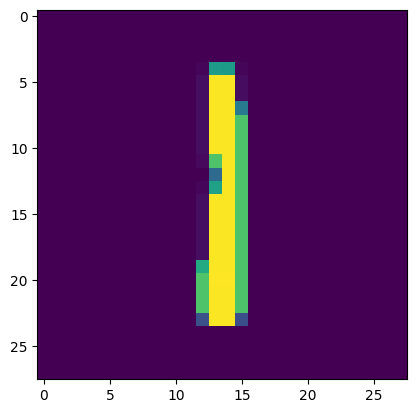

In [24]:
plt.imshow(X[2])

# Baseline

In [25]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [26]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [27]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
237/237 [==============================] - 3s 12ms/step - loss: 0.5507 - accuracy: 0.8314 - val_loss: 0.1359 - val_accuracy: 0.9637
Epoch 2/15
237/237 [==============================] - 3s 12ms/step - loss: 0.1464 - accuracy: 0.9546 - val_loss: 0.0936 - val_accuracy: 0.9765
Epoch 3/15
237/237 [==============================] - 3s 12ms/step - loss: 0.1068 - accuracy: 0.9677 - val_loss: 0.0694 - val_accuracy: 0.9821
Epoch 4/15
237/237 [==============================] - 3s 12ms/step - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 5/15
237/237 [==============================] - 3s 12ms/step - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.0545 - val_accuracy: 0.9863
Epoch 6/15
237/237 [==============================] - 3s 12ms/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0475 - val_accuracy: 0.9884
Epoch 7/15
237/237 [==============================] - 3s 12ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0514 - val_accuracy: 0.9863

In [28]:
score = model.evaluate(X_val, y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03625831753015518
Test accuracy: 0.9878571629524231


263/263 [==============================] - 0s 2ms/step


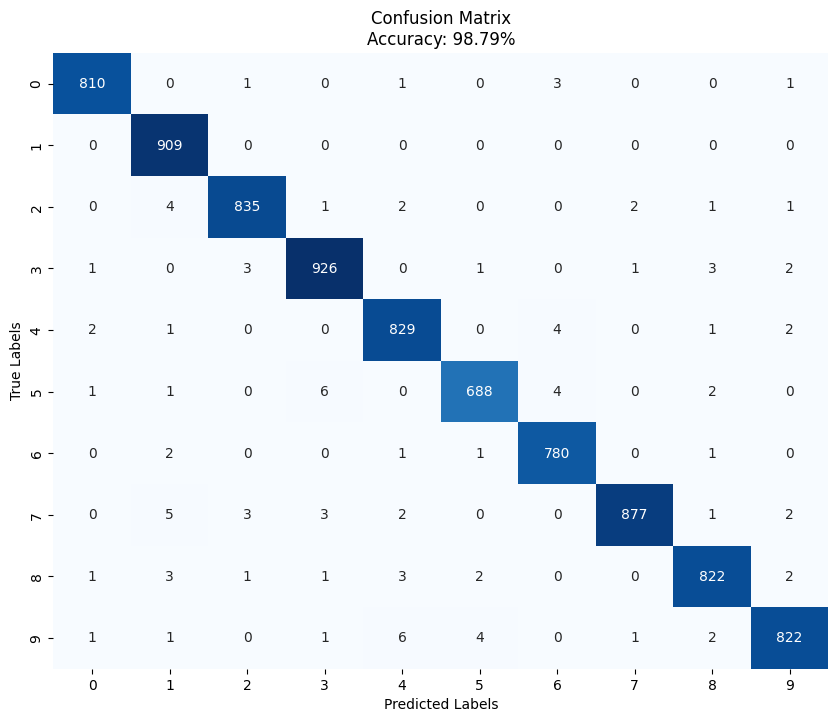

In [29]:

y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.show()

Lets try Data Augmentation

In [30]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [31]:
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1927 - accuracy: 0.9408 - val_loss: 0.0443 - val_accuracy: 0.9845
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1316 - accuracy: 0.9613 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 3/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1168 - accuracy: 0.9652 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1044 - accuracy: 0.9678 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 5/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1011 - accuracy: 0.9693 - val_loss: 0.0296 - val_accuracy: 0.9902
Epoch 6/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0942 - accuracy: 0.9717 - val_loss: 0.0461 - val_accuracy: 0.9845
Epoch 7/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0918 - accuracy: 0.9717 - val_loss: 0.0255 - val_accuracy:

263/263 [==============================] - 0s 2ms/step


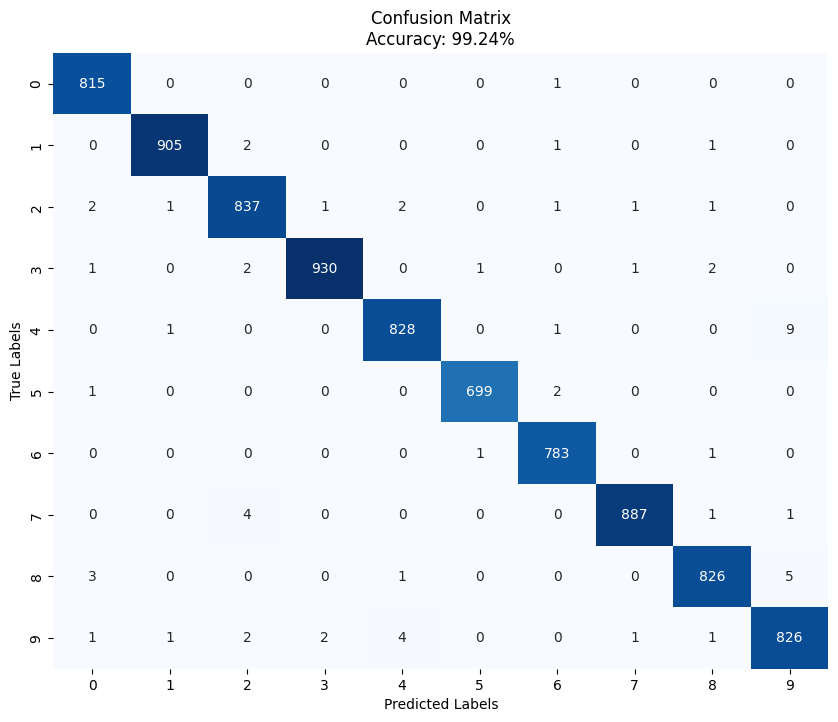

In [32]:
y_val_augmented_pred_probs = model.predict(X_val)
y_val_augmented_pred = np.argmax(y_val_augmented_pred_probs, axis=1)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(np.argmax(y_val, axis=1), y_val_augmented_pred)
accuracy = accuracy_score(np.argmax(y_val, axis=1), y_val_augmented_pred)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.show()

Great! we improved the model with data augmentation.

In [33]:
# Lets see if we can improve the model more adding more layers, adjusting dropout and adding batch normalization

In [38]:
# Baseline
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28, 1)),
#         keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         keras.layers.Flatten(),
#         keras.layers.Dropout(0.5),
#         keras.layers.Dense(10, activation="softmax"),
#     ]
# )

# model.summary()

model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.1174 - accuracy: 0.9648 - val_loss: 0.1376 - val_accuracy: 0.9556
Epoch 2/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0574 - accuracy: 0.9830 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 3/10
1050/1050 [==============================] - 34s 33ms/step - loss: 0.0422 - accuracy: 0.9881 - val_loss: 0.0536 - val_accuracy: 0.9860
Epoch 4/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0673 - val_accuracy: 0.9815
Epoch 5/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0487 - val_accuracy: 0.9867
Epoch 6/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0470 - val_accuracy: 0.9877
Epoch 7/10
1050/1050 [==============================] - 32s 30ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.0664 -

In [39]:
score = model.evaluate(X_val, y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0253757331520319
Test accuracy: 0.9936904907226562


In [40]:
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0717 - accuracy: 0.9798 - val_loss: 0.0211 - val_accuracy: 0.9933
Epoch 2/10
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0219 - val_accuracy: 0.9935
Epoch 3/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch 4/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0345 - accuracy: 0.9898 - val_loss: 0.0408 - val_accuracy: 0.9875
Epoch 5/10
1050/1050 [==============================] - 34s 33ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0389 - val_accuracy: 0.9905
Epoch 6/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0314 - accuracy: 0.9912 - val_loss: 0.0168 - val_accuracy: 0.9945
Epoch 7/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0334 -

263/263 [==============================] - 2s 9ms/step


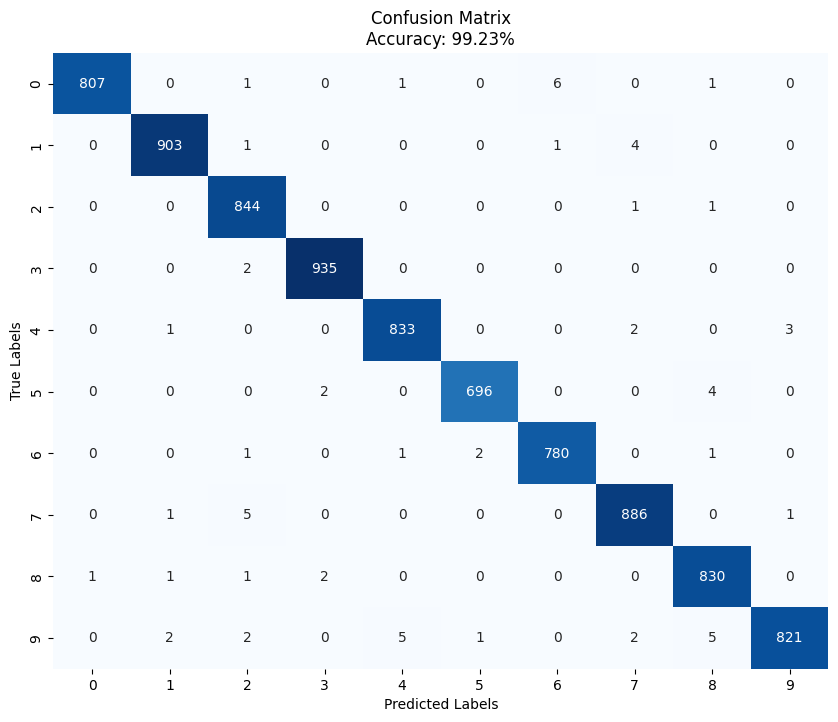

In [41]:
y_val_augmented_pred_probs = model.predict(X_val)
y_val_augmented_pred = np.argmax(y_val_augmented_pred_probs, axis=1)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(np.argmax(y_val, axis=1), y_val_augmented_pred)
accuracy = accuracy_score(np.argmax(y_val, axis=1), y_val_augmented_pred)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')
plt.show()

Nice! we improved from our baseline of 98.94 to 99.24 by tuning layers, droput, batch nomrlization and data augmentation.

Scratch for getting the logic in the app

In [79]:
model.save('digits_model1.h5')

/Users/quinn/.pyenv/versions/3.11.4/envs/practice/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
row_to_save = df.iloc[0:1, :].drop(['label'],axis=1)

# Save the row to a JSON file
row_to_save.to_json("row_data.json", orient="records", lines=True)

In [80]:

# Load the saved model
loaded_model = keras.saving.load_model("digits_model1.h5")

In [98]:
df_sample = pd.read_json('row_data.json', orient='records', lines=True)
# print(df_sample['label'])
# droped the label for the web app testing.
X_sample = df_sample
X_sample = X_sample.values / 255.0
X_sample = X_sample.reshape(-1, 28, 28, 1)

In [96]:
sample_pred = loaded_model.predict(X_sample)
sample_arg = np.argmax(sample_pred, axis=1)
sample_arg[0]

1/1 [==============================] - 0s 12ms/step


1